## Task 3
### - Adith Sreeram A S
In this task we have to 

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can work to make more profit.

● What all business problems you can derive by exploring the data?

Data can be found here - https://bit.ly/3i4rbWl

## Importing our Libraries and Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "C:\\Users\\ADITH SREE RAM\\Downloads\\SampleSuperstore.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#dropping unwanted columns
df.drop(['Postal Code', 'Country'], axis = 1, inplace = True)

In [8]:
duplicates = df.duplicated()
duplicates.sum()

50

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
duplicates = df.duplicated()
duplicates.sum()

0

## Data Visualization

In [11]:
corr = df.corr()

<AxesSubplot:>

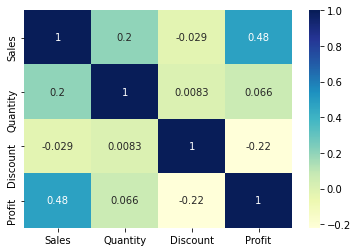

In [12]:
sns.heatmap(corr, annot = True, cmap="YlGnBu" )

### Discount vs Profit

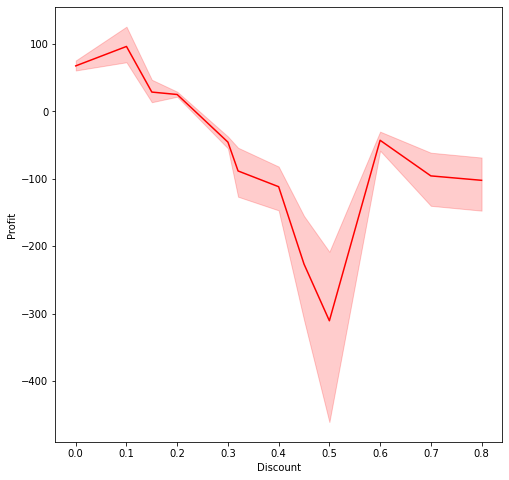

In [13]:
plt.figure(figsize=(8,8))
sns.lineplot(x='Discount', y='Profit', color='red', data=df)
plt.show()

### Quantity vs Profit

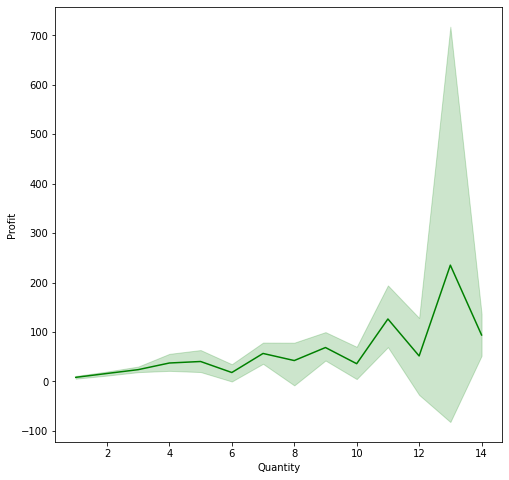

In [14]:
plt.figure(figsize=(8,8))
sns.lineplot(x='Quantity', y='Profit', color='green', data=df)
plt.show()

### Sales By State

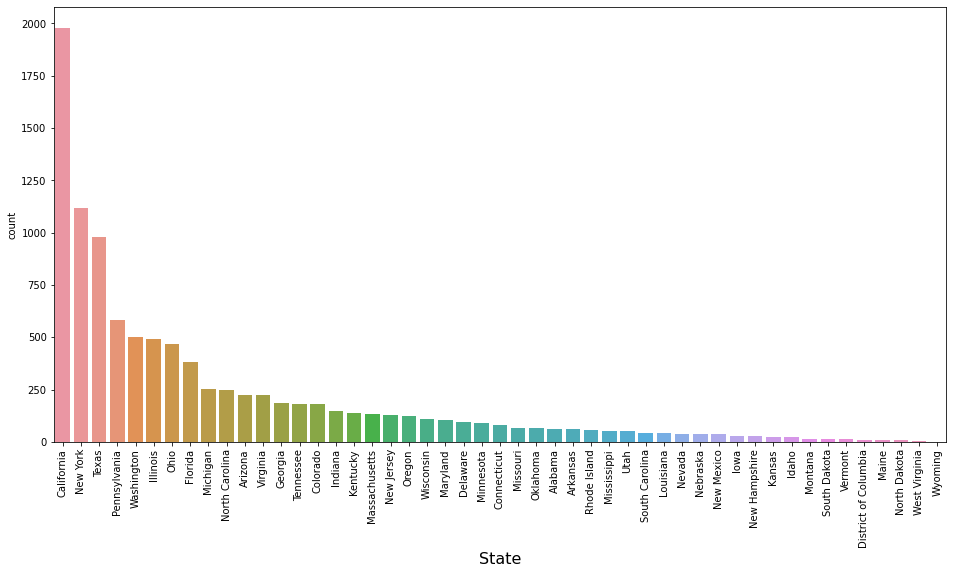

In [15]:
plt.figure(figsize=(16,8))
chart = sns.countplot(x='State', data=df, order=df['State'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel("State", fontsize = 16)
plt.show()

### Category wise Sales

Text(0.5, 1.0, 'Category wise sales')

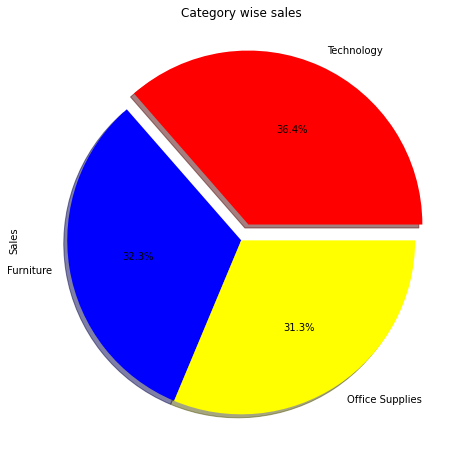

In [16]:
pie = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))
explode=(0.1, 0.0, 0.0)
color = ['red', 'blue', 'yellow']
pie.plot.pie(autopct = "%1.1f%%", explode = explode, colors = color, shadow = True)
plt.title('Category wise sales')

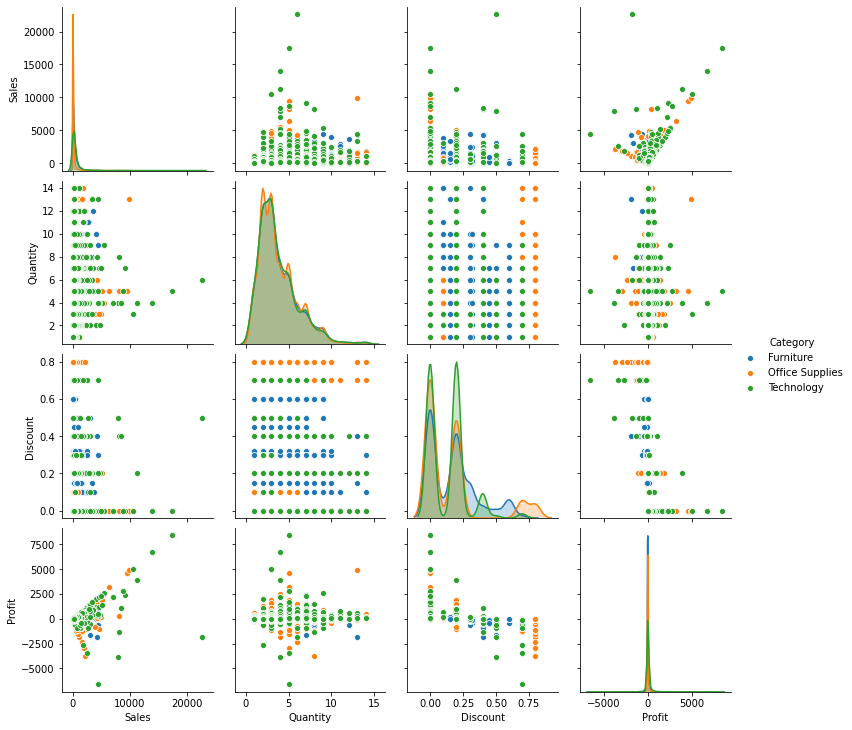

In [17]:
sns.pairplot(df, hue = 'Category', diag_kind = 'kde')

In [18]:
#allotting the 
df_loss = df[df['Profit']<0]
df_profit = df[df['Profit']>0]

### Finding Profitable ship mode

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

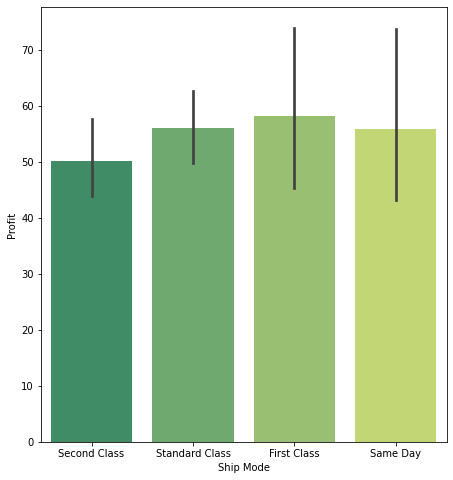

In [19]:
plt.figure(figsize=(16,8))
axes = plt.subplot(121)
sns.barplot(x = 'Ship Mode', y='Profit', data = df_profit, palette = "summer")

### Visualizing Subcategory

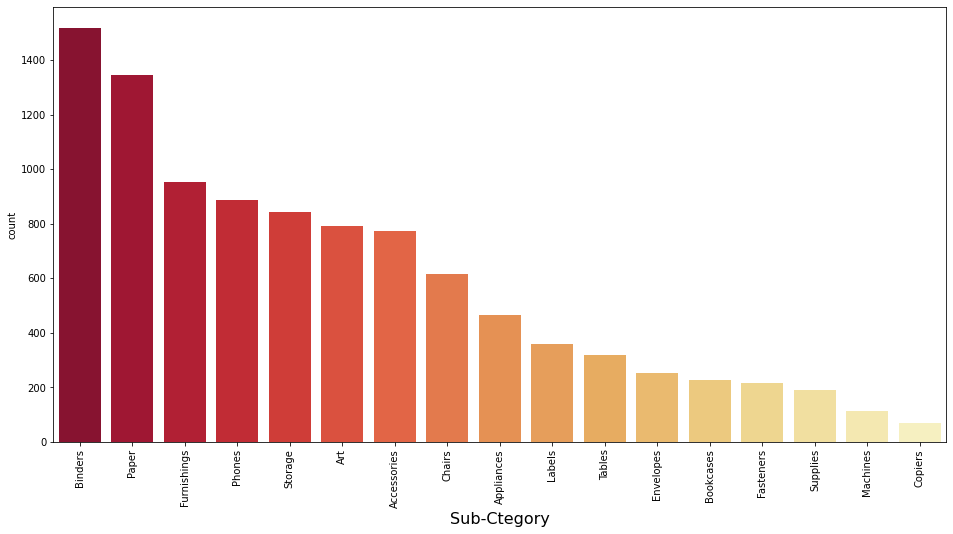

In [20]:
plt.figure(figsize=(16,8))
sub_ca_count = sns.countplot(x = 'Sub-Category', data = df, order=df['Sub-Category'].value_counts().index, palette = 'YlOrRd_r')

sub_ca_count.set_xticklabels(sub_ca_count.get_xticklabels(), rotation=90)
sub_ca_count.set_xlabel("Sub-Ctegory", fontsize = 16)
plt.show()

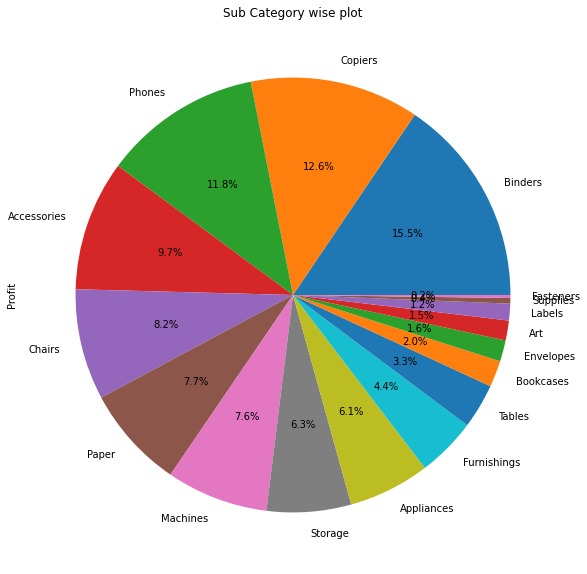

In [21]:
x = df_profit.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False)

plt.figure(figsize = (10,10))
x.plot.pie(autopct = "%1.1f%%")
plt.title('Sub Category wise plot')
plt.show()

### Comparing Sales and Profit among segments

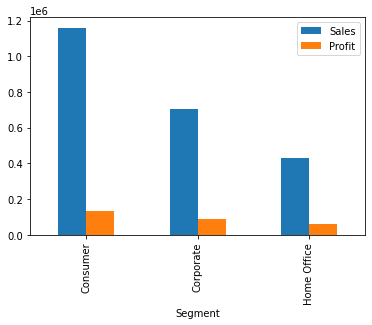

In [22]:
y = df.groupby('Segment')[['Sales', 'Profit']].sum()
y.plot.bar()
plt.show()

# Results:

So, after Visualizing our data we can tell our Business Manager that

1) To gain more profit he should sell his products only at 10% discount and not more than that.

2) His companies performance is very maximum in California, New York and in Texas.

3) When it comes to sales based on Category -> Products that come under technology were sold the most.

4) Based on Ship-Mode The first class shipping mode gives the company a lot more profit when compared to others.

5) Binders, papers and Furnishings are the most sold products.

6) The sales of Binders, Copiers and Phones were more profitable.

7) Interesting fact here is Copiers is the least sold product but still it yeilds the second highest profit for the company.

8) The sales done more for the consumers and so, the profit.

-------------------------------------------------------------------------------------------------------------------------------

# Thank You watching, Like the video and Leave a comment down below.